In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
file_path = "./Sales_Data/"

file_list = os.listdir(file_path)

file_list = [file_path + f for f in file_list]

file_list

['./Sales_Data/Sales_December_2019.csv',
 './Sales_Data/Sales_April_2019.csv',
 './Sales_Data/Sales_February_2019.csv',
 './Sales_Data/Sales_March_2019.csv',
 './Sales_Data/Sales_August_2019.csv',
 './Sales_Data/Sales_May_2019.csv',
 './Sales_Data/Sales_November_2019.csv',
 './Sales_Data/Sales_October_2019.csv',
 './Sales_Data/Sales_January_2019.csv',
 './Sales_Data/Sales_September_2019.csv',
 './Sales_Data/Sales_July_2019.csv',
 './Sales_Data/Sales_June_2019.csv']

In [3]:
# very important to add ignore index or it will read the title for column titles in each file
base_df = pd.concat([ pd.read_csv(file) for file in file_list], ignore_index=True)

base_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [4]:
base_df.to_csv('all_sales_2019.csv', index=False)

In [5]:
data = pd.read_csv('all_sales_2019.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [7]:
# remove empty lines
data = data.dropna(axis=0, how='all')

In [8]:
# remove column titles
data = data[data['Order Date'].str[:2] != 'Or']

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


## 1. What was the best month for sales, how much money was earned that month?

In [10]:
# convert date to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], infer_datetime_format=True)

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


In [11]:
# add month column
def add_month(row):
    month = row['Order Date'].month
    return month

def add_weekday(date):
    return date.weekday()

# three ways to do this
data['Month'] = data.apply(add_month, axis=1)
data['Hour'] = data['Order Date'].dt.hour
data['Weekday'] = data['Order Date'].apply(lambda x : add_weekday(x))

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Weekday
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,0,0
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,7,6
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,18,3
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,15,6
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,12,2


In [12]:
# add order total column
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])

def add_order_total(row):
    quantity = row['Quantity Ordered']
    price = row['Price Each']
    total = price * quantity
    return total

# data['Order Total'] = data.apply(add_order_total,axis=1)

# Easier solution:
data['Order Total'] = data['Quantity Ordered'] * data['Price Each']

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Weekday,Order Total
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,0,0,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,7,6,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,18,3,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,15,6,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,12,2,11.95


In [13]:
# print total monthly sales

monthly_sales = data.groupby('Month').sum(numeric_only=True)

monthly_sales

,Quantity Ordered,Price Each,Hour,Weekday,Order Total
Month,,,,,
1,10903,1811768.38,139485,28406,1822256.73
2,13449,2188884.72,172669,36110,2202022.42
3,17005,2791207.83,218969,48428,2807100.38
4,20558,3367671.02,262259,52070,3390670.24
5,18667,3135125.13,238780,49545,3152606.75
6,15253,2562025.61,195528,42966,2577802.26
7,16072,2632539.56,206169,40052,2647775.76
8,13448,2230345.42,172289,37002,2244467.88
9,13109,2084992.09,168513,34877,2097560.13


Text(0.5, 1.0, 'Total Monthly Sales')

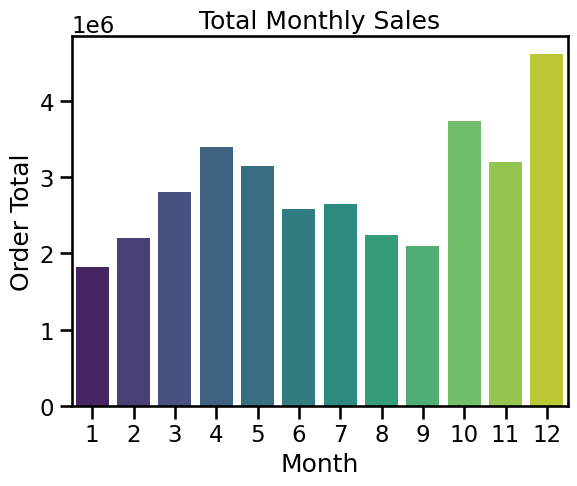

In [14]:
sns.set_context("talk")

ax = sns.barplot(monthly_sales, y="Order Total", x=monthly_sales.index, palette='viridis')

ax.set_title('Total Monthly Sales')

In [15]:
print("The best month for sales was " + pd.to_datetime(monthly_sales['Order Total'].idxmax(), format="%m").strftime('%B') + ", with " + f'{monthly_sales["Order Total"].max():,.2f}' + " $ worth of sales.")

The best month for sales was December, with 4,613,443.34 $ worth of sales.


In [16]:
# not really relevant 
# hourly_sales = data.groupby('Hour')['Order Total'].sum()

# print("The most popular hour for sales was " + str(hourly_sales.idxmax()) + ":00.")

## 2. What City had the highest number of sales ?

In [17]:
# My solution
# be sure to add .str in front of every string method or it won't work
# data['City'] = data['Purchase Address'].str.split(',').str[1].str.strip()

# Alternative 1
# data['City'] = data['Purchase Address'].apply(lambda x : x.split(',')[1].strip())

# Alternative 2
def add_city_column(address):
    split_address = address.split(',')
    city = split_address[1].strip()
    state = split_address[2].strip().split(' ')[0]
    return f"{city} ({state})"

# lambda x to grab a cell's contents
data['City'] = data['Purchase Address'].apply(lambda x : add_city_column(x))

# using apply, we can also write it this way:
# data['City'] = data['Purchase Address'].apply(lambda x : add_city_column(x) + ", " + add_state_column(x))


data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Weekday,Order Total,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,0,0,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,7,6,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,18,3,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,15,6,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,12,2,11.95,Atlanta (GA)


In [18]:
sales_by_city = data.groupby(['City'])[['Order Total','Quantity Ordered']].sum(numeric_only=True)

sales_by_city

,Order Total,Quantity Ordered
City,,
Atlanta (GA),2795498.58,16602
Austin (TX),1819581.75,11153
Boston (MA),3661642.01,22528
Dallas (TX),2767975.40,16730
Los Angeles (CA),5452570.80,33289
New York City (NY),4664317.43,27932
Portland (ME),449758.27,2750
Portland (OR),1870732.34,11303
San Francisco (CA),8262203.91,50239


Text(0, 0.5, 'Sales')

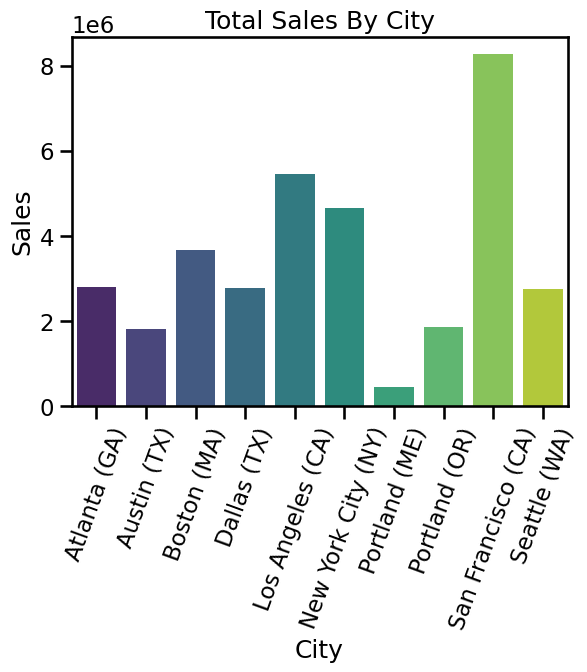

In [19]:
ax = sns.barplot(sales_by_city, x=sales_by_city.index, y='Order Total', palette="viridis")
plt.xticks(rotation=70)

ax.set_title('Total Sales By City')
ax.set_ylabel('Sales')


## 3. What time should we display advertisement to maximize likelyhood of customers buying product

In [20]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Weekday,Order Total,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,0,0,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,7,6,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,18,3,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,15,6,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,12,2,11.95,Atlanta (GA)


In [21]:
# be careful to add aggfunc='count' to the pivot table, results are wildly different otherwise.
weekly_sales = data.pivot_table(index="Weekday", columns="Hour", values="Quantity Ordered", aggfunc='count')

weekly_sales

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
0,563,311,172,125,125,190,354,582,897,1238,...,1550,1367,1526,1577,1692,1863,1714,1565,1249,901
1,556,351,181,126,121,189,375,618,975,1311,...,1663,1570,1483,1584,1864,1830,1801,1642,1209,875
2,565,346,205,131,111,221,346,581,847,1214,...,1553,1527,1495,1564,1740,1834,1627,1594,1275,864
3,547,331,163,126,131,176,351,563,881,1303,...,1511,1480,1500,1502,1720,1814,1773,1518,1263,899
4,593,335,175,98,108,183,349,533,899,1195,...,1546,1380,1457,1522,1710,1888,1791,1530,1256,920
5,541,330,182,118,127,168,381,550,910,1266,...,1600,1462,1488,1560,1747,1846,1748,1537,1234,906
6,545,346,165,107,131,194,326,584,847,1221,...,1561,1389,1435,1590,1807,1830,1774,1535,1336,910


[Text(0, 0.5, 'Mon'),
 Text(0, 1.5, 'Tue'),
 Text(0, 2.5, 'Wed'),
 Text(0, 3.5, 'Thu'),
 Text(0, 4.5, 'Fri'),
 Text(0, 5.5, 'Sat'),
 Text(0, 6.5, 'Sun')]

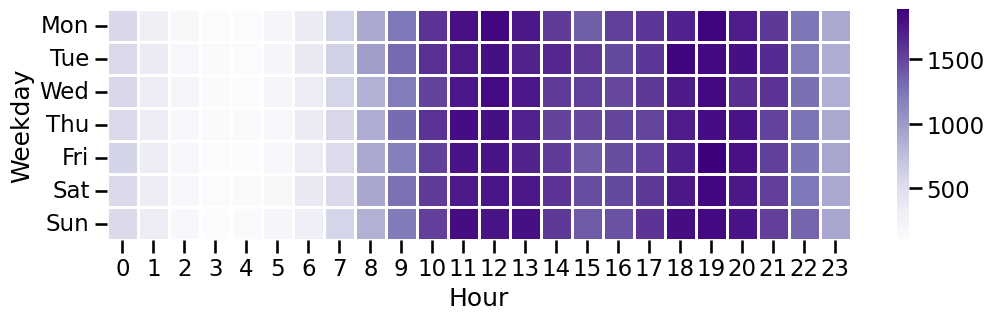

In [22]:
plt.figure(figsize=(12,3))

ax = sns.heatmap(weekly_sales, cmap="Purples",linecolor='white',linewidths=1)
ax.set_yticklabels(['Mon','Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],rotation='horizontal')


Since I'm an OOH specialist, I'd recommend placing ads right before peak buying times, so 8-11AM and 6-8PM.

## 4. What products are often sold together ?


In [23]:
data.head()

# https://stackoverflow.com/questions/57203018/pandas-get-most-frequent-values-used-together-in-the-same-column
# > must use frozenset because list considers [ 1, 2 ] and [ 2, 1 ] different
# > this crates a Series, but we convert it back to DataFrame from rename_axis
# > the totals shown don't totally match with the video so it's possible that what I'm getting isn't 100% correct, however it's good enough in this case
# > i know what's wrong, i'm not taking into account quantity ordered
sales_by_order_content = data.groupby('Order ID')['Product'].apply(frozenset).str.join(', ').value_counts().rename_axis('product combinations').reset_index(name='#')

sales_by_order_content.head()

,product combinations,#
0,Lightning Charging Cable,19882
1,AAA Batteries (4-pack),19874
2,AA Batteries (4-pack),19844
3,USB-C Charging Cable,19838
4,Wired Headphones,17242


In [24]:
most_popular_combination = sales_by_order_content[sales_by_order_content['product combinations'].apply(lambda x: len(x.split(",")) == 2)]

most_popular_combination.head(20)

,product combinations,#
17,"Lightning Charging Cable, iPhone",895
18,"Google Phone, USB-C Charging Cable",869
21,"Wired Headphones, iPhone",374
22,"USB-C Charging Cable, Vareebadd Phone",318
23,"Google Phone, Wired Headphones",311
24,"Apple Airpods Headphones, iPhone",299
25,"Google Phone, Bose SoundSport Headphones",169
26,"Wired Headphones, Vareebadd Phone",110
27,"Lightning Charging Cable, AA Batteries (4-pack)",103
28,"USB-C Charging Cable, Lightning Charging Cable",96


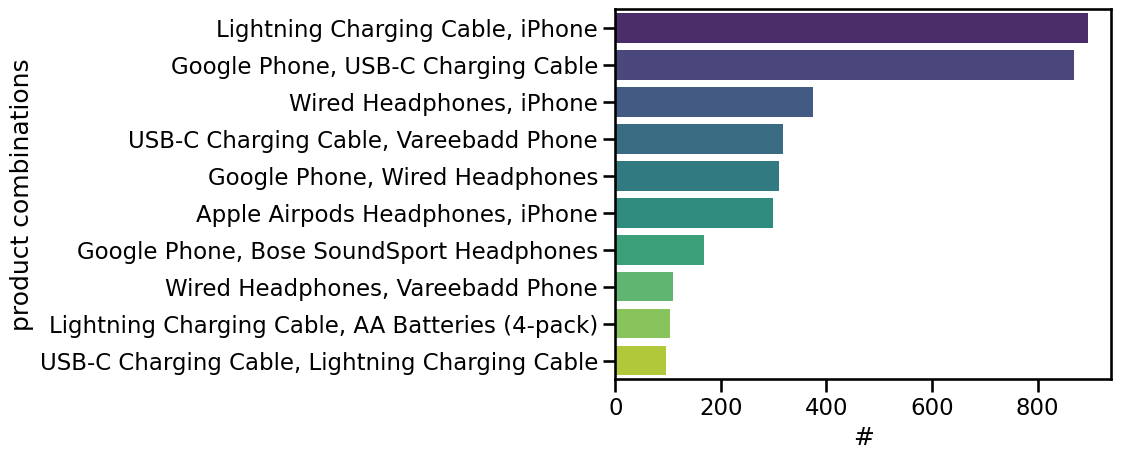

In [25]:
ax = sns.barplot(data=most_popular_combination[:10], y='product combinations', x='#', palette="viridis")

## 5. What product sold the most? Why do you think it sold the most?

In [26]:
sales_by_product = data.groupby(['Product'])['Quantity Ordered'].sum().nlargest(10).reset_index(name = 'Quantity Ordered')

sales_by_product



,Product,Quantity Ordered
0,AAA Batteries (4-pack),31017
1,AA Batteries (4-pack),27635
2,USB-C Charging Cable,23975
3,Lightning Charging Cable,23217
4,Wired Headphones,20557
5,Apple Airpods Headphones,15661
6,Bose SoundSport Headphones,13457
7,27in FHD Monitor,7550
8,iPhone,6849
9,27in 4K Gaming Monitor,6244


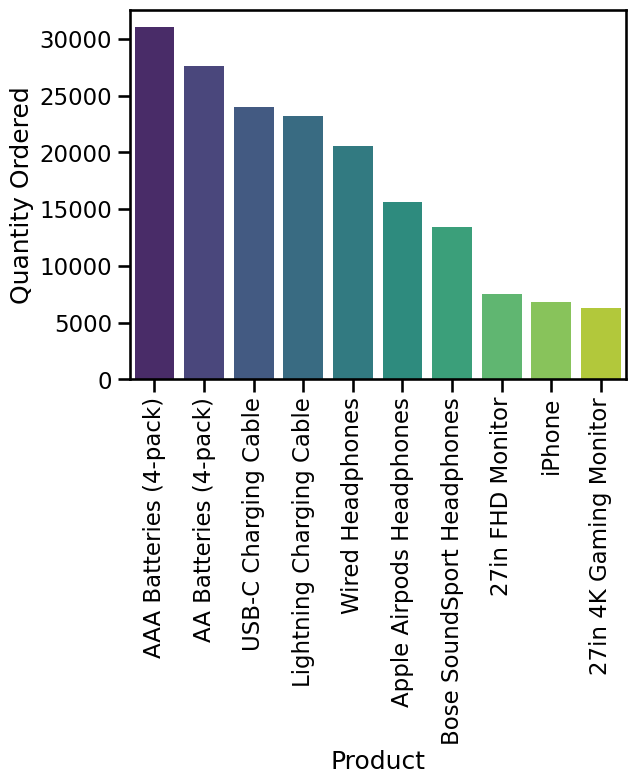

In [27]:
plt.xticks(rotation='vertical')

ax = sns.barplot(sales_by_product, x='Product', y='Quantity Ordered', palette='viridis')
prices = data.groupby('Product').mean(numeric_only= True)['Price Each'].reset_index(name='Avg Price')


In [28]:
# sales_by_product = pd.merge(sales_by_product, prices, on='Product')
sales_by_product

,Product,Quantity Ordered,Avg Price
0,AAA Batteries (4-pack),31017,2.99
1,AA Batteries (4-pack),27635,3.84
2,USB-C Charging Cable,23975,11.95
3,Lightning Charging Cable,23217,14.95
4,Wired Headphones,20557,11.99
5,Apple Airpods Headphones,15661,150.00
6,Bose SoundSport Headphones,13457,99.99
7,27in FHD Monitor,7550,149.99
8,iPhone,6849,700.00
9,27in 4K Gaming Monitor,6244,389.99


<AxesSubplot: xlabel='Product', ylabel='Avg Price'>

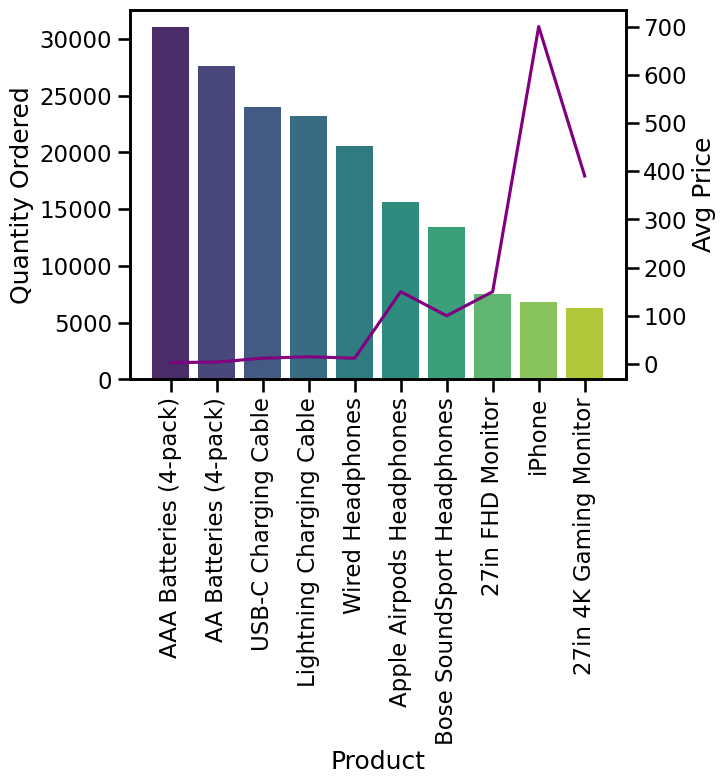

In [55]:
plt.xticks(rotation='vertical')

ax = sns.barplot(data=sales_by_product, y='Quantity Ordered', x='Product', palette='viridis')
ax2 = ax.twinx()

sns.lineplot(data=sales_by_product, y='Avg Price', x="Product", ax=ax2, color='purple')